In [1]:
import numpy as np
csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する
np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

In [2]:
print(fuji[130: 140])

[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


# 【問題1】データの可視化

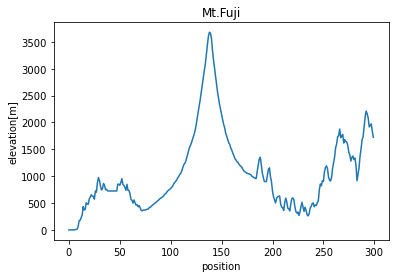

In [3]:
import matplotlib.pyplot as plt

plt.title("Mt.Fuji")
plt.xlabel("position")
plt.ylabel("elevation[m]")

plt.plot(fuji[:, 0], fuji[: , 3])
plt.show()

# 【問題2】ある地点の勾配を計算する関数を作成

In [4]:
def compute_grad(selected_x, y):
    
    some_grad = (y[selected_x] - y[selected_x - 1]) / (selected_x - (selected_x -1))
    return some_grad


selected_x = 100
y = fuji[:, 3]
some_grad = compute_grad(selected_x, y)

print(some_grad)

18.90000000000009


# 【問題3】移動先の地点を計算する関数を作成

In [5]:
def compute_next_y(selected_x, y, a=0.2):
    next_x = selected_x - a*compute_grad(selected_x, y)
    next_x = np.maximum(1, next_x)
    next_x = np.minimum(len(y)-1, next_x)
    next_x = np.round(next_x).astype(np.int)
    return next_x


selected_x = 100
y = fuji[:, 3]
a = 0.2
next_x =  compute_next_y(selected_x, y, a)

print(next_x)

96


# 【問題4】山を下る関数を作成

In [6]:
# x_listの最後尾がダブれば終了

def gradient_descent(selected_x, y, a=0.2):    
    x_list = [selected_x]
    
    while True:
        x_list.append(compute_next_y(x_list[-1], y, a))
        if x_list[-1] in x_list[:-1]:
            break
            
    return x_list[:-1]


selected_x = 136
x_list = gradient_descent(selected_x, y, a=0.2)

print(x_list)
print(y[x_list])

[136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75]
[3434.59  817.62  741.17  672.36  631.71  575.07  505.1   458.66  418.41
  368.91  412.27  390.14  386.64  371.19]


# 【問題5】下山過程の可視化

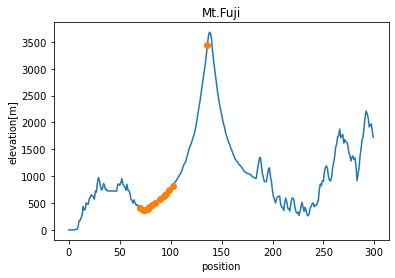

In [7]:
import matplotlib.pyplot as plt

plt.title("Mt.Fuji")
plt.xlabel("position")
plt.ylabel("elevation[m]")

plt.plot(fuji[:, 0], fuji[: , 3])
plt.plot(x_list, y[x_list], "o")
plt.show()

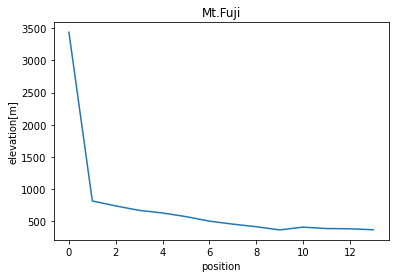

In [8]:
# 繰り返し毎の標高

plt.title("Mt.Fuji")
plt.xlabel("position")
plt.ylabel("elevation[m]")

plt.plot(y[x_list])
plt.show()

 # 【問題6】初期値の変更

In [9]:
# 全ての初期値のx_listのリスト
various_lists = []

for i in range(1, 300):
    selected_x = i
    various_lists.append(gradient_descent(selected_x, y, a=0.2))
    
print(various_lists)
print(len(various_lists))

[[1], [2], [3], [4], [5], [6, 5], [7], [8, 7], [9, 1], [10, 1], [11, 10, 1], [12, 2], [13, 4], [14, 1], [15, 27, 31, 51, 41], [16, 14, 1], [17, 1], [18, 22, 13, 4], [19, 21, 15, 27, 31, 51, 41], [20, 1], [21, 15, 27, 31, 51, 41], [22, 13, 4], [23, 28, 1], [24], [25, 36, 52, 37, 35, 43], [26, 1], [27, 31, 51, 41], [28, 1], [29, 10, 1], [30, 41], [31, 51, 41], [32, 47], [33, 27, 31, 51, 41], [34, 15, 27, 31, 51, 41], [35, 43], [36, 52, 37, 35, 43], [37, 35, 43], [38, 44], [39], [40], [41], [42], [43], [44], [45], [46], [47], [48, 22, 13, 4], [49], [50, 54, 58, 80], [51, 41], [52, 37, 35, 43], [53, 74], [54, 58, 80], [55, 63, 74], [56, 66, 74], [57, 35, 43], [58, 80], [59], [60, 73, 70, 78, 77, 75], [61, 83, 80], [62, 64, 52, 37, 35, 43], [63, 74], [64, 52, 37, 35, 43], [65, 76, 75], [66, 74], [67, 66, 74], [68, 76, 75], [69, 64, 52, 37, 35, 43], [70, 78, 77, 75], [71, 81, 77, 75], [72, 73, 70, 78, 77, 75], [73, 70, 78, 77, 75], [74], [75], [76, 75], [77, 75], [78, 77, 75], [79, 73, 70, 7

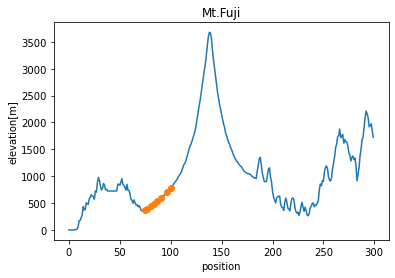

[100, 96, 90, 87, 84, 81, 77, 75]
[772.58 700.15 588.99 536.54 488.4  443.   386.64 371.19]


In [10]:
# 初期値100

import matplotlib.pyplot as plt

plt.title("Mt.Fuji")
plt.xlabel("position")
plt.ylabel("elevation[m]")

plt.plot(fuji[:, 0], fuji[: , 3])
plt.plot(various_lists[99], y[various_lists[99]], "o")
plt.show()

print(various_lists[99])
print(y[various_lists[99]])

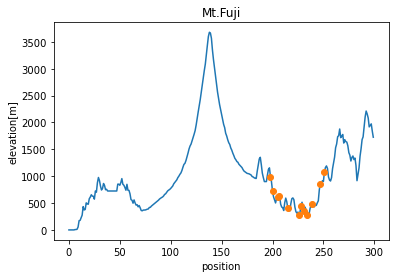

[200, 234, 251, 215, 239, 228, 206, 205, 198, 231, 247, 226]
[ 723.66  278.95 1079.27  405.96  491.04  440.61  622.89  620.23  990.05
  344.44  855.15  270.33]


In [11]:
# 初期値200

plt.title("Mt.Fuji")
plt.xlabel("position")
plt.ylabel("elevation[m]")

plt.plot(fuji[:, 0], fuji[: , 3])
plt.plot(various_lists[199], y[various_lists[199]], "o")
plt.show()

print(various_lists[199])
print(y[various_lists[199]])

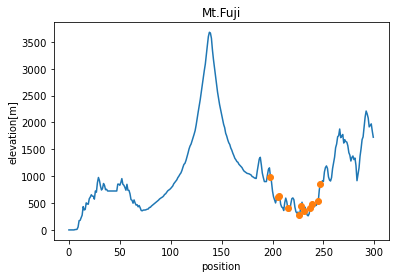

[245, 237, 215, 239, 228, 206, 205, 198, 231, 247, 226]
[542.   409.72 405.96 491.04 440.61 622.89 620.23 990.05 344.44 855.15
 270.33]


In [12]:
# 初期値250

plt.title("Mt.Fuji")
plt.xlabel("position")
plt.ylabel("elevation[m]")

plt.plot(fuji[:, 0], fuji[: , 3])
plt.plot(various_lists[244], y[various_lists[244]], "o")
plt.show()

print(various_lists[244])
print(y[various_lists[244]])

# 【問題7】（アドバンス問題）ハイパーパラメータの変更

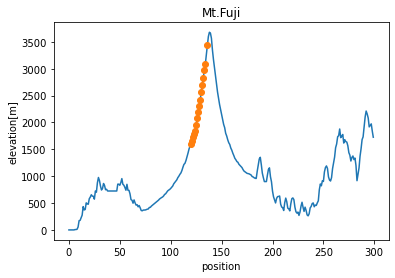

[136, 134, 133, 132, 131, 130, 129, 128, 127, 126, 125, 124, 123, 122, 121, 120]
[3434.59 3087.81 2967.9  2825.55 2703.1  2563.4  2426.1  2306.85 2196.53
 2076.15 1953.48 1850.02 1781.98 1726.5  1659.43 1598.36]


In [13]:
# a = 0.01

selected_x = 136
a = 0.01
x_list = gradient_descent(selected_x, y, a)

import matplotlib.pyplot as plt

plt.title("Mt.Fuji")
plt.xlabel("position")
plt.ylabel("elevation[m]")

plt.plot(fuji[:, 0], fuji[: , 3])
plt.plot(x_list, y[x_list], "o")
plt.show()

print(x_list)
print(y[x_list])

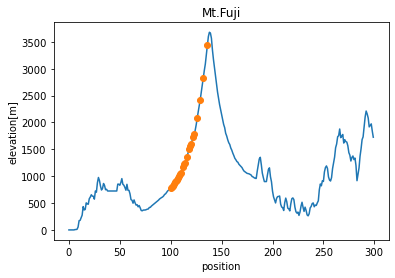

[136, 132, 129, 126, 123, 122, 120, 119, 118, 116, 114, 113, 112, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100]
[3434.59 2825.55 2426.1  2076.15 1781.98 1726.5  1598.36 1561.94 1506.66
 1360.1  1239.97 1219.86 1166.58 1059.69 1034.34 1000.24  973.32  932.74
  910.5   883.89  858.62  817.62  795.25  772.58]


In [14]:
# a = 0.025

selected_x = 136
a = 0.025
x_list = gradient_descent(selected_x, y, a)


plt.title("Mt.Fuji")
plt.xlabel("position")
plt.ylabel("elevation[m]")

plt.plot(fuji[:, 0], fuji[: , 3])
plt.plot(x_list, y[x_list], "o")
plt.show()

print(x_list)
print(y[x_list])

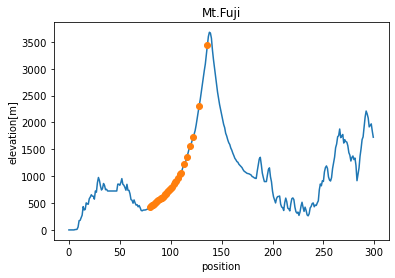

[136, 128, 122, 119, 116, 113, 110, 109, 107, 105, 104, 103, 101, 100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80]
[3434.59 2306.85 1726.5  1561.94 1360.1  1219.86 1059.69 1034.34  973.32
  910.5   883.89  858.62  795.25  772.58  753.68  741.17  725.72  700.15
  672.36  660.43  631.71  613.04  602.36  588.99  575.07  553.64  536.54
  519.54  505.1   488.4   471.82  458.66  443.    420.6 ]


In [15]:
# a = 0.05

selected_x = 136
a = 0.05
x_list = gradient_descent(selected_x, y, a)


plt.title("Mt.Fuji")
plt.xlabel("position")
plt.ylabel("elevation[m]")

plt.plot(fuji[:, 0], fuji[: , 3])
plt.plot(x_list, y[x_list], "o")
plt.show()

print(x_list)
print(y[x_list])

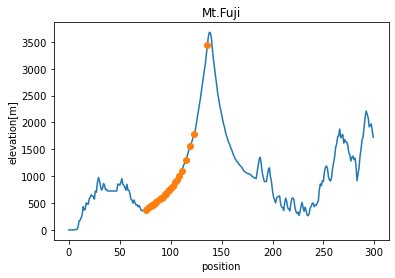

[136, 123, 119, 115, 111, 108, 106, 104, 102, 100, 99, 98, 97, 95, 94, 92, 91, 90, 89, 87, 86, 85, 84, 83, 82, 81, 79, 77, 76]
[3434.59 1781.98 1561.94 1292.52 1105.8  1000.24  932.74  883.89  817.62
  772.58  753.68  741.17  725.72  672.36  660.43  613.04  602.36  588.99
  575.07  536.54  519.54  505.1   488.4   471.82  458.66  443.    418.41
  386.64  377.62]


In [16]:
# a = 0.075

selected_x = 136
a = 0.075
x_list = gradient_descent(selected_x, y, a)


plt.title("Mt.Fuji")
plt.xlabel("position")
plt.ylabel("elevation[m]")

plt.plot(fuji[:, 0], fuji[: , 3])
plt.plot(x_list, y[x_list], "o")
plt.show()

print(x_list)
print(y[x_list])

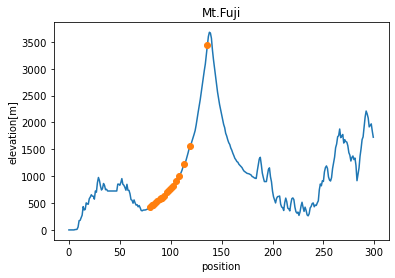

[136, 119, 113, 108, 105, 102, 100, 98, 96, 93, 91, 90, 89, 87, 85, 83, 82, 80]
[3434.59 1561.94 1219.86 1000.24  910.5   817.62  772.58  741.17  700.15
  631.71  602.36  588.99  575.07  536.54  505.1   471.82  458.66  420.6 ]


In [17]:
# a = 0.10

selected_x = 136
a = 0.10
x_list = gradient_descent(selected_x, y, a)


plt.title("Mt.Fuji")
plt.xlabel("position")
plt.ylabel("elevation[m]")

plt.plot(fuji[:, 0], fuji[: , 3])
plt.plot(x_list, y[x_list], "o")
plt.show()

print(x_list)
print(y[x_list])